## Note :
- Standardization And Normalization Donot change the distribution of the data, They just scale the values in certain range

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df = pd.read_csv('./Datasets/house_prices/train.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Getting rid of Missing columns and rows

In [5]:
nan_cols = df.isnull().mean()*100
nan_cols = nan_cols[nan_cols>10].keys()
nan_cols

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
df2 = df.drop(nan_cols,axis = 1)
df2 = df2.dropna()
df2.shape

(1338, 75)

In [7]:
df.shape

(1460, 81)

# Visualizing the distribution of all numerical values

In [8]:
num_cols = df2.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols[1:]
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
num_cols.shape

(36,)

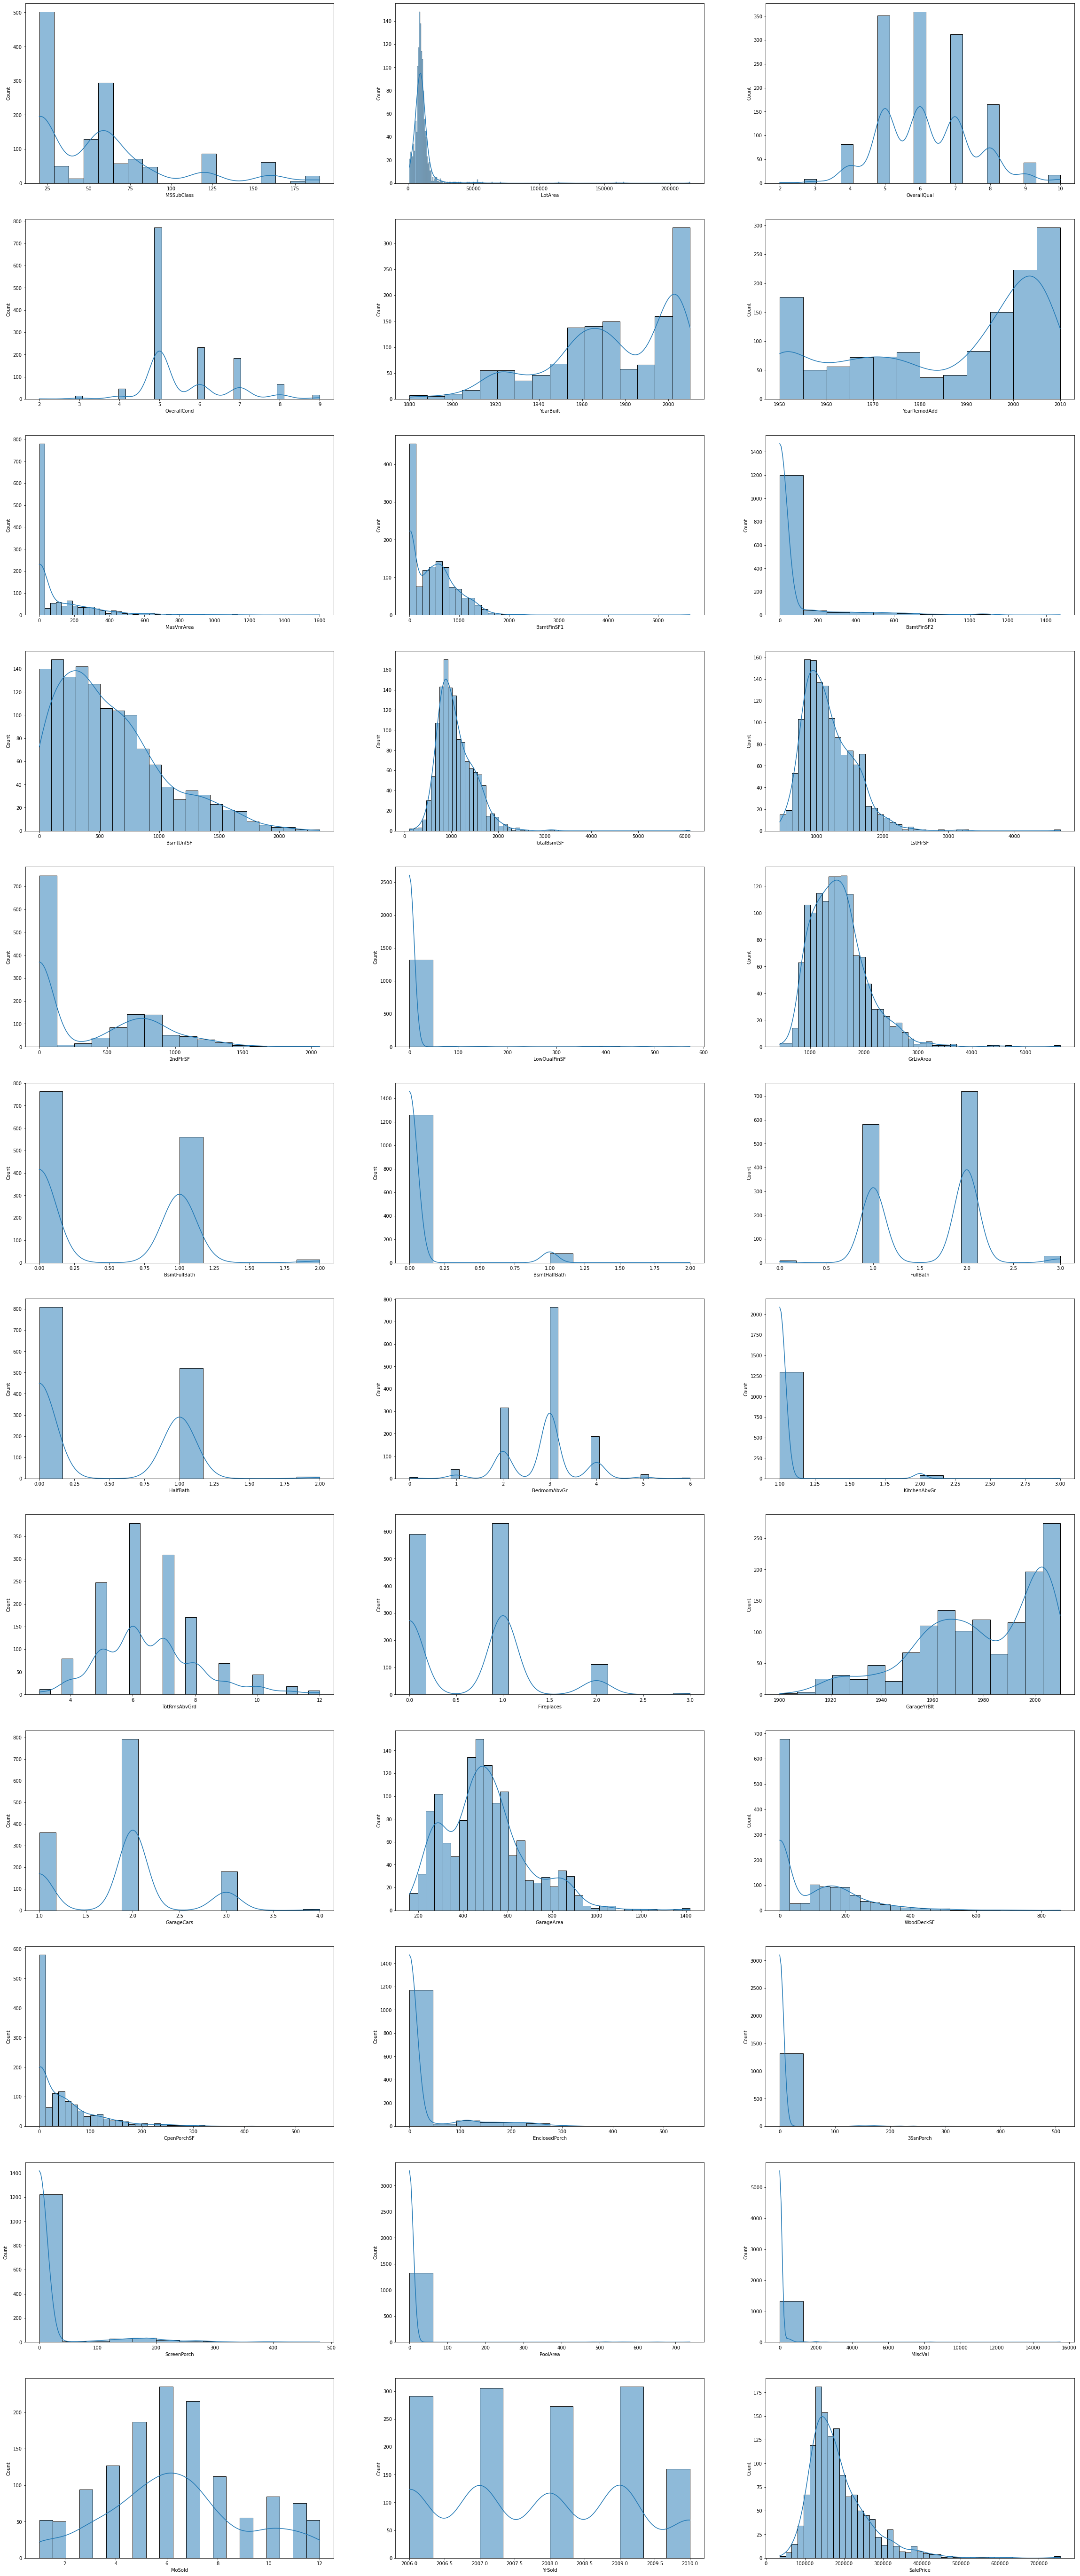

In [10]:
plt.figure(figsize=(40,100))

for i in range(len(num_cols)):
    plt.subplot(12,3,i+1)
    sns.histplot(df2[num_cols[i]], kde=True)

In [11]:
# columns selected for Standardization

std_cols = ['OverallQual','TotalBsmtSF','GrLivArea','BedroomAbvGr','TotRmsAbvGrd','MoSold','SalePrice']

In [12]:
# columns selected for Normalization

norm_cols = [i for i in num_cols if i not in std_cols]
norm_cols

['MSSubClass',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

In [13]:
num_cols.shape

(36,)

In [14]:
len(std_cols) + len(norm_cols)

36

# Standardization using sklearn.preprocessing.StandardScaler

In [15]:
# importing library

from sklearn.preprocessing import StandardScaler

In [16]:
# creating an object

standardizer = StandardScaler()

In [17]:
# fit and transform

df3 = standardizer.fit_transform(df2[std_cols])
df3

array([[ 0.58933748, -0.59187468,  0.33132137, ...,  0.91508049,
        -1.60531944,  0.27557072],
       [-0.16596285,  0.40959829, -0.52957906, ..., -0.34716456,
        -0.49356095, -0.06670249],
       [ 0.58933748, -0.43400702,  0.47736698, ..., -0.34716456,
         0.98878371,  0.46572249],
       ...,
       [ 0.58933748,  0.13826325,  1.54196259, ...,  1.54620302,
        -0.49356095,  1.01082426],
       [-0.92126319, -0.04427123, -0.88316316, ..., -0.97828709,
        -0.86414711, -0.56585091],
       [-0.92126319,  0.3947982 , -0.54110897, ..., -0.34716456,
        -0.12297478, -0.49771319]])

In [18]:
# mean values

standardizer.mean_

array([6.21973094e+00, 1.09594768e+03, 1.53758520e+03, 2.86472347e+00,
       6.55007474e+00, 6.33183857e+00, 1.86761783e+05])

In [19]:
#  standard deviation values

standardizer.scale_

array([1.32397663e+00, 4.05402854e+02, 5.20385387e+02, 7.76386819e-01,
       1.58447838e+00, 2.69842778e+00, 7.88843527e+04])

In [20]:
df3 = pd.DataFrame(df3, columns=std_cols)
df3.head()

,OverallQual,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,MoSold,SalePrice
0,0.589337,-0.591875,0.331321,0.174239,0.915080,-1.605319,0.275571
1,-0.165963,0.409598,-0.529579,0.174239,-0.347165,-0.493561,-0.066702
2,0.589337,-0.434007,0.477367,0.174239,-0.347165,0.988784,0.465722
3,0.589337,-0.838543,0.344773,0.174239,0.283958,-1.605319,-0.592789
4,1.344638,0.120996,1.269088,1.462256,1.546203,2.100542,0.801657


In [22]:
# Comparision of before and after Standardization

In [24]:
# before Standardization

df2[std_cols].describe()

,OverallQual,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,MoSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,6.219731,1095.947683,1537.585202,2.864723,6.550075,6.331839,186761.782511
std,1.324472,405.554435,520.579960,0.776677,1.585071,2.699437,78913.847668
min,2.000000,105.000000,438.000000,0.000000,3.000000,1.000000,35311.000000
25%,5.000000,819.750000,1160.000000,2.000000,5.000000,5.000000,135000.000000
50%,6.000000,1021.500000,1480.000000,3.000000,6.000000,6.000000,168500.000000
75%,7.000000,1324.000000,1791.500000,3.000000,7.000000,8.000000,220000.000000
max,10.000000,6110.000000,5642.000000,6.000000,12.000000,12.000000,755000.000000


In [27]:
# after standardization : mean = 0 and std_deviation = 1

df3[std_cols].describe().round(2)

,OverallQual,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,MoSold,SalePrice
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.19,-2.44,-2.11,-3.69,-2.24,-1.98,-1.92
25%,-0.92,-0.68,-0.73,-1.11,-0.98,-0.49,-0.66
50%,-0.17,-0.18,-0.11,0.17,-0.35,-0.12,-0.23
75%,0.59,0.56,0.49,0.17,0.28,0.62,0.42
max,2.86,12.37,7.89,4.04,3.44,2.10,7.20


In [28]:
# updating the dataframe

df2.update(df3)
df2[std_cols].head()

,OverallQual,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,MoSold,SalePrice
0,0.589337,-0.591875,0.331321,0.174239,0.915080,-1.605319,0.275571
1,-0.165963,0.409598,-0.529579,0.174239,-0.347165,-0.493561,-0.066702
2,0.589337,-0.434007,0.477367,0.174239,-0.347165,0.988784,0.465722
3,0.589337,-0.838543,0.344773,0.174239,0.283958,-1.605319,-0.592789
4,1.344638,0.120996,1.269088,1.462256,1.546203,2.100542,0.801657


# Normalization using sklearn.preprocessing.MinMaxScaler

In [29]:
# importing library

from sklearn.preprocessing import MinMaxScaler

In [30]:
# creating the object

normalizer = MinMaxScaler()

In [31]:
# fit & transform

df4 = normalizer.fit_transform(df2[norm_cols])
df4

array([[0.23529412, 0.0334198 , 0.42857143, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.03879502, 0.85714286, ..., 0.        , 0.        ,
        0.25      ],
       [0.23529412, 0.04650728, 0.42857143, ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.29411765, 0.03618687, 1.        , ..., 0.        , 0.16129032,
        1.        ],
       [0.        , 0.03934189, 0.57142857, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.04037019, 0.57142857, ..., 0.        , 0.        ,
        0.5       ]])

In [32]:
# converting to dataframe

df4 = pd.DataFrame(df4,columns=norm_cols)
df4.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,0.235294,0.033420,0.428571,0.946154,0.883333,0.12250,0.125089,0.0,0.064212,0.098260,0.413559,0.0,0.5,0.0,0.666667,0.5,0.0,0.000000,0.936364,0.333333,0.308426,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.50
1,0.000000,0.038795,0.857143,0.738462,0.433333,0.00000,0.173281,0.0,0.121575,0.193700,0.000000,0.0,0.0,0.5,0.666667,0.0,0.0,0.333333,0.690909,0.333333,0.238474,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.25
2,0.235294,0.046507,0.428571,0.930769,0.866667,0.10125,0.086109,0.0,0.185788,0.113305,0.419370,0.0,0.5,0.0,0.666667,0.5,0.0,0.333333,0.918182,0.333333,0.356121,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.50
3,0.294118,0.038561,0.428571,0.269231,0.333333,0.00000,0.038271,0.0,0.231164,0.122943,0.366102,0.0,0.5,0.0,0.333333,0.0,0.0,0.333333,0.890909,0.666667,0.383148,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.00
4,0.235294,0.060576,0.428571,0.923077,0.833333,0.21875,0.116052,0.0,0.209760,0.166197,0.509927,0.0,0.5,0.0,0.666667,0.5,0.0,0.333333,0.909091,0.666667,0.537361,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.50


In [33]:
# Comparision of before and after Normalization

In [34]:
# before Normalization

df2[norm_cols].describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000
mean,56.136024,10706.294469,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1176.221973,357.141256,4.221973,0.438714,0.060538,1.575486,0.402840,1.029895,0.648729,1978.596413,1.87145,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,2007.805680
std,41.252576,10336.621126,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,386.644986,440.324982,40.712916,0.515630,0.241685,0.547570,0.504185,0.174697,0.645393,24.773741,0.63428,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,1.330691
min,20.000000,1300.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2006.000000
25%,20.000000,7744.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,894.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1962.000000,1.00000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2007.000000
50%,50.000000,9600.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1098.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1980.000000,2.00000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2008.000000
75%,70.000000,11760.750000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,1414.000000,740.500000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2002.000000,2.00000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2009.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,4692.000000,2065.000000,572.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2010.000000,4.00000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,2010.000000


In [39]:
# after Normalization : min = 0 and max = 1

df4[norm_cols].describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.212565,0.043966,0.513773,0.715609,0.594482,0.068975,0.082253,0.033391,0.249356,0.173536,0.172950,0.007381,0.219357,0.030269,0.525162,0.201420,0.014948,0.216243,0.714513,0.290483,0.271423,0.115968,0.087354,0.038521,0.007059,0.034238,0.004079,0.002770,0.451420
std,0.242662,0.048314,0.154018,0.227412,0.338274,0.116003,0.081289,0.112752,0.188335,0.090890,0.213232,0.071176,0.257815,0.120843,0.182523,0.252093,0.087349,0.215131,0.225216,0.211427,0.148459,0.148818,0.119493,0.110225,0.059497,0.120941,0.056858,0.032778,0.332673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030120,0.428571,0.584615,0.300000,0.000000,0.000000,0.000000,0.106164,0.107193,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.563636,0.000000,0.172893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
50%,0.176471,0.038795,0.428571,0.738462,0.741667,0.000000,0.073175,0.000000,0.209332,0.155148,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.333333,0.727273,0.333333,0.257552,0.007001,0.051188,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.294118,0.048895,0.571429,0.930769,0.900000,0.108750,0.129872,0.000000,0.349208,0.229431,0.358596,0.000000,0.500000,0.000000,0.666667,0.500000,0.000000,0.333333,0.927273,0.333333,0.336248,0.203617,0.127971,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
